# Init

In [15]:
import pandas  as pd
import pickle
import matplotlib.pyplot
import sys
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import matplotlib.pyplot as plt
from functools import reduce
from tqdm import tqdm
import  snakeviz
import seaborn as sns

import itertools
from scipy.stats import binom


In [2]:
sys.path.append('C:\Repos\WhoCell\who_cell')
sys.path.append('C:\Repos\WhoCell')
sys.path.append('C:/Repos/WhoCell/who_cell/simulation/')
sys.path.append('C:\Repos\WhoCell\who_cell\experiments')
sys.path.append('C:/Repos/WhoCell/who_cell/models')
sys.path.append('C:\Repos\pomegranate')


from pomegranate import *
import pomegranate as pome
import transitions_dict
import who_cell
from gibbs_experiments import GibbsExperiment
from gibbs_sampler import GibbsSampler
from simulation_for_gibbs import Simulator_for_Gibbs
from experiment_report import ExperimentReport

# run model with big N - and find why we dont convarge well

In [3]:
model_defining_params_pre = ['N', "d", "n_states",'is_acyclic']
params_dict = {
    'is_acyclic': [False],
    'N': [20],
    'd': [5],
    'n_states': [10],
    'number_of_smapled_traj': [100],
    'p_prob_of_observation': [0.7, 1],
    'N_itres': [50],
    'w_smapler_n_iter': [20]}

In [4]:
er = ExperimentReport()

all_results = GibbsExperiment.run_multi_params_and_return_results(params_dict,model_defining_params_pre)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [16:42<00:00, 20.04s/it]

finish solving


In [58]:
ws_p_one = all_results[0][1]
all_results[0][1].keys()


dict_keys(['all_relvent_observations', 'sampler', 'all_states', 'all_observations_sum', 'all_sampled_transitions', 'all_transitions', 'all_mues', 'all_ws', 'sampled_transitions_dict', 'sampled_mues', 'mutual_params', 'hyper_params', 'all_full_sampled_trajs', 'all_full_sampled_trajs_states', 'all_relvent_sampled_trajs_states', 'simulator', 'sigmas', 'original_pome_model', 'state_to_distrbution_mapping', 'start_probabilites', 'is_acyclic'])

In [63]:
[i for i in all_results[0][1]['all_full_sampled_trajs_states']]

[['(4, 0)',
  '(0, 1)',
  '(2, 2)',
  '(4, 3)',
  '(1, 4)',
  '(1, 5)',
  '(1, 6)',
  '(3, 7)',
  '(4, 8)',
  '(0, 9)',
  '(1, 10)',
  '(0, 11)',
  '(0, 12)',
  '(0, 13)',
  '(2, 14)',
  '(3, 15)',
  '(4, 16)',
  '(0, 17)',
  '(0, 18)'],
 ['(4, 0)',
  '(0, 1)',
  '(4, 2)',
  '(4, 3)',
  '(4, 4)',
  '(1, 5)',
  '(2, 6)',
  '(2, 7)',
  '(2, 8)',
  '(0, 9)',
  '(3, 10)',
  '(2, 11)',
  '(2, 12)',
  '(0, 13)',
  '(1, 14)',
  '(0, 15)',
  '(0, 16)',
  '(2, 17)',
  '(2, 18)'],
 ['(1, 0)',
  '(1, 1)',
  '(4, 2)',
  '(4, 3)',
  '(1, 4)',
  '(1, 5)',
  '(2, 6)',
  '(2, 7)',
  '(1, 8)',
  '(3, 9)',
  '(4, 10)',
  '(0, 11)',
  '(4, 12)',
  '(4, 13)',
  '(3, 14)',
  '(0, 15)',
  '(0, 16)',
  '(1, 17)',
  '(3, 18)'],
 ['(4, 0)',
  '(0, 1)',
  '(4, 2)',
  '(4, 3)',
  '(4, 4)',
  '(1, 5)',
  '(1, 6)',
  '(4, 7)',
  '(2, 8)',
  '(0, 9)',
  '(3, 10)',
  '(3, 11)',
  '(0, 12)',
  '(0, 13)',
  '(2, 14)',
  '(1, 15)',
  '(3, 16)',
  '(4, 17)',
  '(2, 18)'],
 ['(4, 0)',
  '(0, 1)',
  '(4, 2)',
  '(0, 3)',


In [66]:
[i for i in all_results[0][1]['all_relvent_observations']]

[[2.972107483415533,
  4.077759028945048,
  10.035198320085591,
  3.039134031577968,
  2.9108660144328096,
  3.097867235870909],
 [7.058023420516413,
  4.98720078445027,
  7.976955663186097,
  9.843852331396432,
  0.8430988855652255,
  8.013953541697491],
 [2.8765030863509593,
  4.894242164195393,
  0.9789369154236868,
  5.0996768714293355,
  1.8926642459441854,
  4.968233479001593,
  5.000279568011307,
  3.930876325466234,
  9.923837167570506,
  10.04849533860848],
 [1.9619092735920372,
  7.045183683708592,
  4.988976433417622,
  5.1876405126839735,
  8.047658306493153,
  3.0578037120110375,
  7.958166432801635],
 [9.05169299176405,
  0.7921857899999716,
  9.991644700782729,
  7.9089712588460435,
  5.889227342714169,
  1.9359913706265215,
  4.025583208967823],
 [4.951566569493551,
  3.931668965133018,
  0.9213694060609654,
  7.887382823933466,
  4.059267103065753,
  4.013990387184155,
  8.003383517026354],
 [10.055643362348276,
  9.157431076381505,
  0.9645058524564697,
  0.9675152744

In [24]:
def __build_exp_name(params):
    if len(params) == 0 :
        return 'only'
    if type(params) is tuple :
        return reduce(lambda x, y: str(x)+ '\n' + str(y), params)
    else :
        return reduce(lambda x, y: str(x) + str(y), params.items())

In [25]:
def _insertion_error_over_original(transitions_all_iters ,original_model,params,states,return_comp_df = False) :
    real_res = er._extrect_states_transitions_dict_from_pome_model(original_model)[0]
    comp_dfs = []
    insertion_error_for_iter = []

    for _iter in range(len(transitions_all_iters)):
        sampled_res = transitions_all_iters[_iter]
        # real_res = self._extrect_states_transitions_dict_from_pome_model(original_model)[0]
        res = []
        for _s in states:
            for __s in states:
                if _s in ['start','end'] or __s in ['start','end'] : continue
                _from = _s
                _to = __s

                if _from in sampled_res.keys():
                    if _to in sampled_res[_from].keys():
                        _val = sampled_res[_from][_to]
                    else:
                        _val = 0
                else:
                    _val = 0

                if _from in real_res.keys():
                    if _to in real_res[_from].keys():
                        _val_real = real_res[_from][_to]
                    else:
                        _val_real = 0
                else:
                    _val_real = 0

                res.append([_from, _to, _val, _val_real])

        final_df_for_iter = pd.DataFrame(columns=['from', 'to', "sampled", 'real'], data=res)
        if return_comp_df :
            comp_dfs.append(final_df_for_iter)

        _insertion_error_for_iter = sum(
            ((final_df_for_iter["sampled"] != 0) & (final_df_for_iter["real"] == 0)))
        insertion_error_for_iter.append(_insertion_error_for_iter)

    if return_comp_df:
        return insertion_error_for_iter , comp_dfs
    return insertion_error_for_iter

In [26]:
all_measure_results = {}
for single_model_permuts in all_results.values():
    single_model_results = {}
    for unique_permut in single_model_permuts.values():
        transitions_all_iters = unique_permut["all_transitions"]
        original_model = unique_permut["original_pome_model"]
        params = {**unique_permut['mutual_params'], **unique_permut['hyper_params']}

        insertion_error_for_iter = _insertion_error_over_original(transitions_all_iters ,original_model,
                                                                       params,list(unique_permut['all_states'][-1].keys()))

        exp_name = __build_exp_name(unique_permut['hyper_params'])
        single_model_results[str(exp_name)] = insertion_error_for_iter

    model_name = __build_exp_name(unique_permut['mutual_params'])
    all_measure_results[str(model_name)] = single_model_results

In [28]:
res = _insertion_error_over_original(transitions_all_iters ,original_model,
                                                                       params,list(unique_permut['all_states'][-1].keys()),True)


In [37]:
tmp = res[1][1]
tmp[tmp['sampled'] !=0].head(20)

,from,to,sampled,real
5,"(0, 0)","(0, 1)",0.305417,0.000000
6,"(0, 0)","(1, 1)",0.159704,0.607717
7,"(0, 0)","(2, 1)",0.095236,0.392283
8,"(0, 0)","(3, 1)",0.275753,0.000000
9,"(0, 0)","(4, 1)",0.163890,0.000000
105,"(1, 0)","(0, 1)",0.163500,0.369900
106,"(1, 0)","(1, 1)",0.249431,0.251133
107,"(1, 0)","(2, 1)",0.282306,0.000000
108,"(1, 0)","(3, 1)",0.199971,0.378966
109,"(1, 0)","(4, 1)",0.104792,0.000000


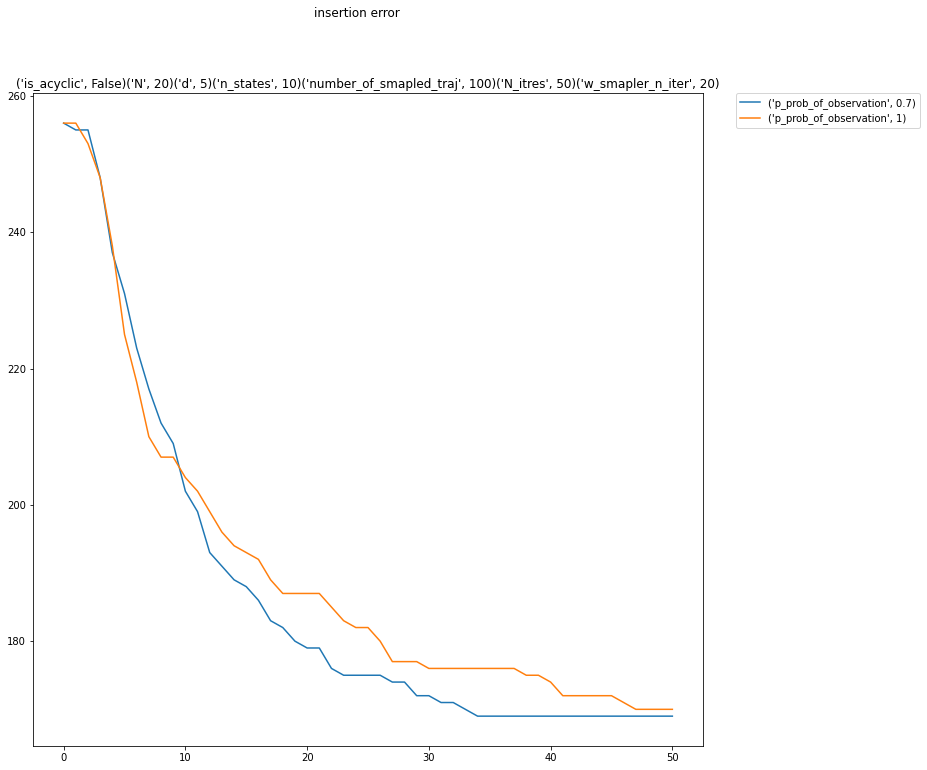

In [6]:
# all_measure_results = self.calculate_measure_over_all_results(all_results)
insertion_error_per_permut = er.calculate_insertion_error_over_all_permuts(all_measure_results)

# self._plot_results(all_measure_results, sup_title = 'kl distance')
er._plot_results(insertion_error_per_permut, sup_title = 'insertion error')


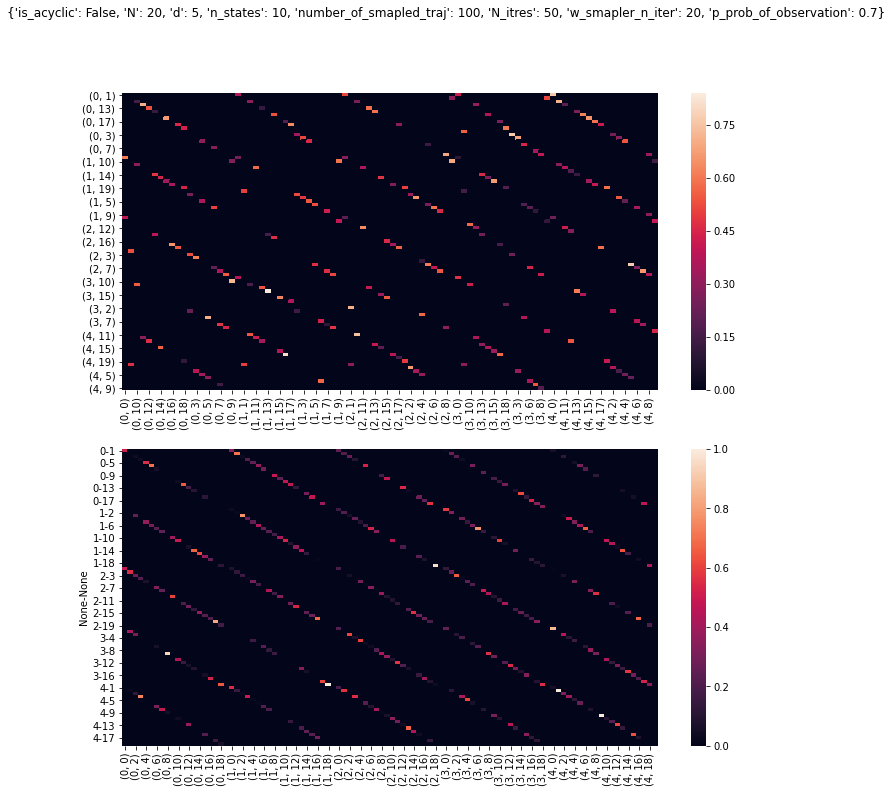

stop


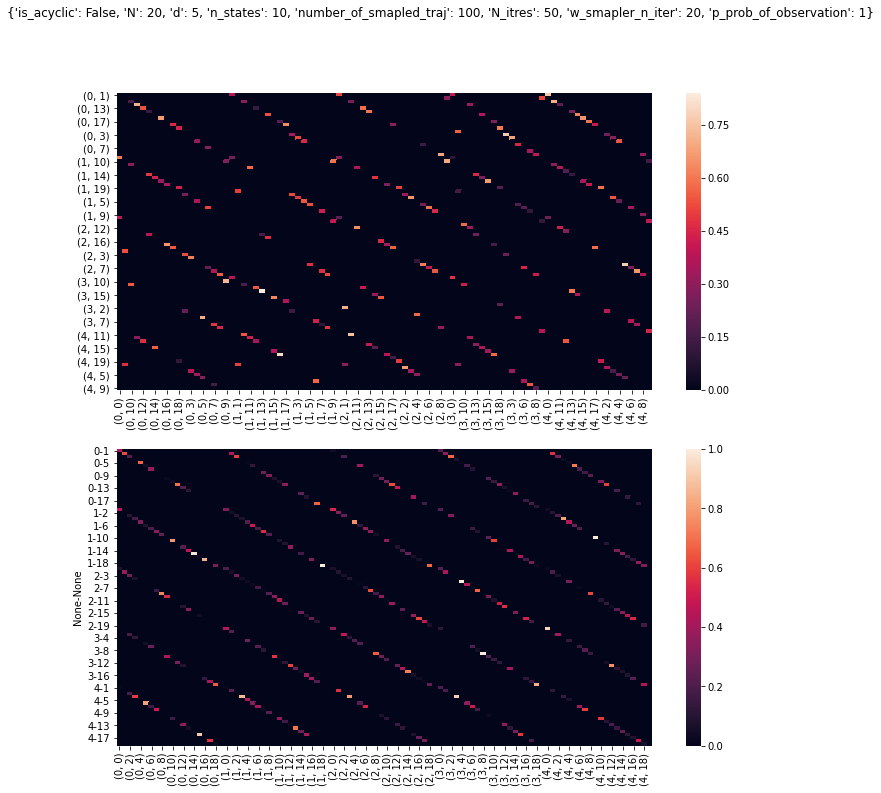

stop


In [16]:
def _plot_transitions_compare(first_trans,second_trans,title):
    if type(first_trans) is not dict :
        first_trans = er._extrect_states_transitions_dict_from_pome_model(first_trans)[0]
        first_trans = {str(k): {str(kk): vv for kk, vv in v.items()} for k, v in first_trans.items()}
    first_trans = {k: v for k, v in first_trans.items() if k != 'start'}
    if type(second_trans) is not dict :
        second_trans = er._extrect_states_transitions_dict_from_pome_model(second_trans)[0]
        second_trans = {str(k): {str(kk): vv for kk, vv in v.items()} for k, v in second_trans.items()}
    second_trans = {k: v for k, v in second_trans.items() if k != 'start'}

    first_trans_df = pd.DataFrame(first_trans)
    second_trans_df = pd.DataFrame(second_trans)
    
    if 'end' in first_trans_df.columns : 
        first_trans_df = first_trans_df.drop(columns = ['end'])

    if 'end' in second_trans_df.columns : 
        second_trans_df = second_trans_df.drop(columns = ['end'])

    
    first_trans_df = first_trans_df.sort_index().sort_index(1)
    second_trans_df = second_trans_df.sort_index().sort_index(1)

    first_trans_df = first_trans_df.fillna(0)
    second_trans_df = second_trans_df.fillna(0)

    fig,subs = plt.subplots(2,1,figsize=(12, 12))
    fig.suptitle(title)

    sns.heatmap(first_trans_df,ax=subs[0])
    sns.heatmap(second_trans_df, ax=subs[1])
    plt.show()

    print('stop')

for single_model_permuts in all_results.values():
        for unique_permut in single_model_permuts.values():
            _plot_transitions_compare(unique_permut['original_pome_model'],
                                       unique_permut['all_transitions'][-1],
                                           str({**unique_permut['mutual_params'],**unique_permut['hyper_params']}))


In [10]:
second_trans_df

NameError: name 'second_trans_df' is not defined

In [70]:
state_params = {'start': 'start', 'end': 'end', (0, 0): (3, 0.1), (1, 0): (7, 0.1), (2, 0): (10, 0.1), (3, 0): (1, 0.1), (4, 0): (4, 0.1), (0, 1): (4, 0.1), (1, 1): (3, 0.1), (2, 1): (6, 0.1), (3, 1): (2, 0.1), (4, 1): (1, 0.1), (0, 2): (9, 0.1), (1, 2): (3, 0.1), (2, 2): (7, 0.1), (3, 2): (10, 0.1), (4, 2): (2, 0.1), (0, 3): (8, 0.1), (1, 3): (2, 0.1), (2, 3): (6, 0.1), (3, 3): (1, 0.1), (4, 3): (7, 0.1), (0, 4): (2, 0.1), (1, 4): (1, 0.1), (2, 4): (5, 0.1), (3, 4): (6, 0.1), (4, 4): (8, 0.1), (0, 5): (8, 0.1), (1, 5): (10, 0.1), (2, 5): (9, 0.1), (3, 5): (4, 0.1), (4, 5): (2, 0.1), (0, 6): (7, 0.1), (1, 6): (2, 0.1), (2, 6): (8, 0.1), (3, 6): (4, 0.1), (4, 6): (5, 0.1), (0, 7): (7, 0.1), (1, 7): (6, 0.1), (2, 7): (9, 0.1), (3, 7): (5, 0.1), (4, 7): (8, 0.1)}

In [71]:
state_params

{'start': 'start',
 'end': 'end',
 (0, 0): (3, 0.1),
 (1, 0): (7, 0.1),
 (2, 0): (10, 0.1),
 (3, 0): (1, 0.1),
 (4, 0): (4, 0.1),
 (0, 1): (4, 0.1),
 (1, 1): (3, 0.1),
 (2, 1): (6, 0.1),
 (3, 1): (2, 0.1),
 (4, 1): (1, 0.1),
 (0, 2): (9, 0.1),
 (1, 2): (3, 0.1),
 (2, 2): (7, 0.1),
 (3, 2): (10, 0.1),
 (4, 2): (2, 0.1),
 (0, 3): (8, 0.1),
 (1, 3): (2, 0.1),
 (2, 3): (6, 0.1),
 (3, 3): (1, 0.1),
 (4, 3): (7, 0.1),
 (0, 4): (2, 0.1),
 (1, 4): (1, 0.1),
 (2, 4): (5, 0.1),
 (3, 4): (6, 0.1),
 (4, 4): (8, 0.1),
 (0, 5): (8, 0.1),
 (1, 5): (10, 0.1),
 (2, 5): (9, 0.1),
 (3, 5): (4, 0.1),
 (4, 5): (2, 0.1),
 (0, 6): (7, 0.1),
 (1, 6): (2, 0.1),
 (2, 6): (8, 0.1),
 (3, 6): (4, 0.1),
 (4, 6): (5, 0.1),
 (0, 7): (7, 0.1),
 (1, 7): (6, 0.1),
 (2, 7): (9, 0.1),
 (3, 7): (5, 0.1),
 (4, 7): (8, 0.1)}

In [76]:
transitions ={(0, 0): {(4, 1): 0.2682926829268293, (2, 1): 0.41236528644356213, (1, 1): 0.3193420306296086}, (1, 0): {(1, 1): 0.40126382306477093, (3, 1): 0.5987361769352291}, (2, 0): {(3, 1): 0.28510182207931406, (2, 1): 0.714898177920686}, (3, 0): {(2, 1): 0.3617216117216117, (3, 1): 0.6382783882783882}, (4, 0): {(1, 1): 0.5156028368794325, (4, 1): 0.48439716312056735}, (0, 1): {(4, 2): 0.853448275862069, (3, 2): 0.14655172413793105}, (1, 1): {(0, 2): 0.24421052631578946, (3, 2): 0.36701754385964913, (1, 2): 0.38877192982456144}, (2, 1): {(4, 2): 0.3234256926952141, (0, 2): 0.3279596977329975, (1, 2): 0.34861460957178836}, (3, 1): {(2, 2): 0.45433919455473626, (4, 2): 0.3709585933068633, (3, 2): 0.17470221213840043}, (4, 1): {(3, 2): 0.6164609053497943, (4, 2): 0.38353909465020575}, (0, 2): {(3, 3): 0.18690601900739173, (0, 3): 0.8130939809926082}, (1, 2): {(2, 3): 0.1708253358925144, (0, 3): 0.8291746641074855}, (2, 2): {(2, 3): 0.42231075697211157, (0, 3): 0.5776892430278884}, (3, 2): {(0, 3): 0.28534145280556766, (4, 3): 0.36363636363636365, (1, 3): 0.35102218355806875}, (4, 2): {(2, 3): 0.3363802559414991, (3, 3): 0.663619744058501}, (0, 3): {(4, 4): 0.7396825396825397, (0, 4): 0.26031746031746034}, (1, 3): {(1, 4): 0.34447674418604646, (2, 4): 0.41133720930232553, (4, 4): 0.2441860465116279}, (2, 3): {(1, 4): 0.45128779395296753, (0, 4): 0.5487122060470324}, (3, 3): {(4, 4): 0.1940983606557377, (3, 4): 0.33901639344262297, (0, 4): 0.4668852459016393}, (4, 3): {(2, 4): 0.17998075072184794, (1, 4): 0.8200192492781521}, (0, 4): {(2, 5): 0.22170900692840645, (0, 5): 0.4472671285604311, (3, 5): 0.33102386451116245}, (1, 4): {(4, 5): 0.4471890971039183, (2, 5): 0.5528109028960818}, (2, 4): {(4, 5): 0.5335628227194492, (2, 5): 0.2134251290877797, (3, 5): 0.25301204819277107}, (3, 4): {(3, 5): 0.28923476005188065, (4, 5): 0.7107652399481194}, (4, 4): {(0, 5): 0.26373626373626374, (3, 5): 0.27765567765567767, (4, 5): 0.4586080586080586}, (0, 5): {(3, 6): 0.3216280925778132, (2, 6): 0.6783719074221867}, (1, 5): {(2, 6): 0.48166948674562887, (0, 6): 0.2989283699943599, (3, 6): 0.2194021432600113}, (2, 5): {(1, 6): 0.29817953546767106, (3, 6): 0.44130571249215317, (4, 6): 0.26051475204017577}, (3, 5): {(1, 6): 0.24053826745164, (2, 6): 0.19848612279226238, (3, 6): 0.5609756097560976}, (4, 5): {(1, 6): 0.16308671439936356, (4, 6): 0.5624502784407319, (0, 6): 0.2744630071599045}, (0, 6): {(1, 7): 0.3893166506256016, (3, 7): 0.23965351299326276, (2, 7): 0.37102983638113574}, (1, 6): {(3, 7): 0.35452793834296725, (1, 7): 0.5016056518946692, (2, 7): 0.1438664097623635}, (2, 6): {(3, 7): 0.35478408128704486, (0, 7): 0.30228619813717184, (2, 7): 0.34292972057578325}, (3, 6): {(1, 7): 0.5410714285714285, (0, 7): 0.4589285714285714}, (4, 6): {(3, 7): 0.37927461139896373, (0, 7): 0.6207253886010363}, 'start': {(0, 0): 0.2, (1, 0): 0.2, (2, 0): 0.2, (3, 0): 0.2, (4, 0): 0.2}, (0, 7): {'end': 1.0}, (1, 7): {'end': 1.0}, (2, 7): {'end': 1.0}, (3, 7): {'end': 1.0}, (4, 7): {'end': 1.0}}

In [77]:
transitions

{(0, 0): {(4, 1): 0.2682926829268293,
  (2, 1): 0.41236528644356213,
  (1, 1): 0.3193420306296086},
 (1, 0): {(1, 1): 0.40126382306477093, (3, 1): 0.5987361769352291},
 (2, 0): {(3, 1): 0.28510182207931406, (2, 1): 0.714898177920686},
 (3, 0): {(2, 1): 0.3617216117216117, (3, 1): 0.6382783882783882},
 (4, 0): {(1, 1): 0.5156028368794325, (4, 1): 0.48439716312056735},
 (0, 1): {(4, 2): 0.853448275862069, (3, 2): 0.14655172413793105},
 (1, 1): {(0, 2): 0.24421052631578946,
  (3, 2): 0.36701754385964913,
  (1, 2): 0.38877192982456144},
 (2, 1): {(4, 2): 0.3234256926952141,
  (0, 2): 0.3279596977329975,
  (1, 2): 0.34861460957178836},
 (3, 1): {(2, 2): 0.45433919455473626,
  (4, 2): 0.3709585933068633,
  (3, 2): 0.17470221213840043},
 (4, 1): {(3, 2): 0.6164609053497943, (4, 2): 0.38353909465020575},
 (0, 2): {(3, 3): 0.18690601900739173, (0, 3): 0.8130939809926082},
 (1, 2): {(2, 3): 0.1708253358925144, (0, 3): 0.8291746641074855},
 (2, 2): {(2, 3): 0.42231075697211157, (0, 3): 0.57768924